In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('adult_with_headers_excelr.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

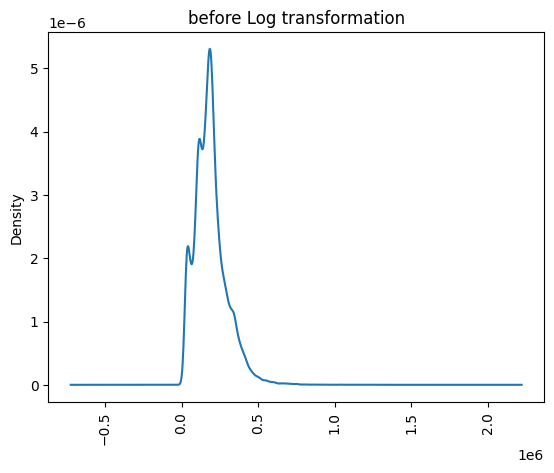

In [6]:
(df['fnlwgt']).plot(kind='kde')
plt.title('before Log transformation')
plt.xticks(rotation=90)
plt.show()

In [7]:
df['fnlwgt']=np.log1p(df['fnlwgt'])

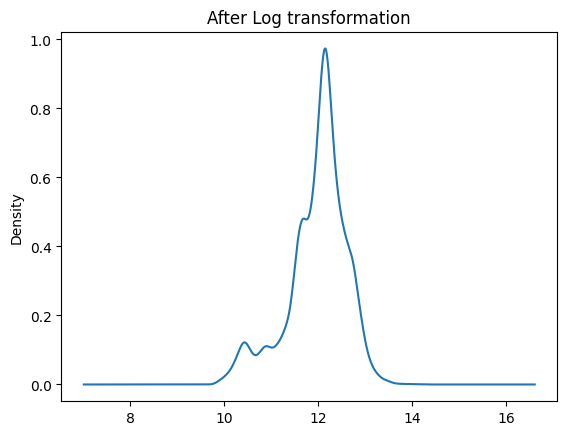

In [8]:
(df['fnlwgt']).plot(kind='kde')
plt.title('After Log transformation')
plt.show()

In [9]:
df['age_group'] = np.where(df['age'] < 18, 'Child',np.where(df['age'] < 60, 'Adult', 'Senior Citizen'))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  int64  
 11  capital_loss    32561 non-null  int64  
 12  hours_per_week  32561 non-null  int64  
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
 15  age_group       32561 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 4.0+ MB


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,11.983778,10.080679,1077.648844,87.303830,40.437456
std,13.640433,0.630738,2.572720,7385.292085,402.960219,12.347429
min,17.000000,9.416216,1.000000,0.000000,0.000000,1.000000
25%,28.000000,11.676981,9.000000,0.000000,0.000000,40.000000
50%,37.000000,12.091542,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.376035,12.000000,0.000000,0.000000,45.000000
max,90.000000,14.210727,16.000000,99999.000000,4356.000000,99.000000


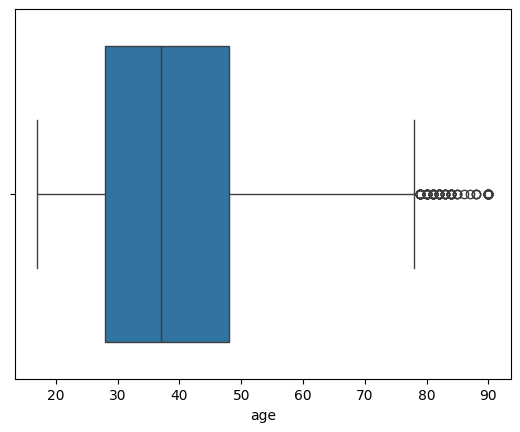

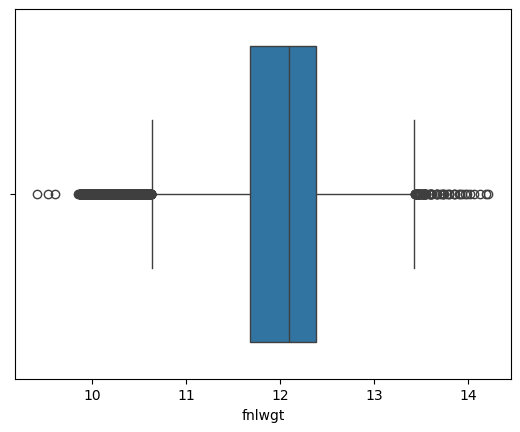

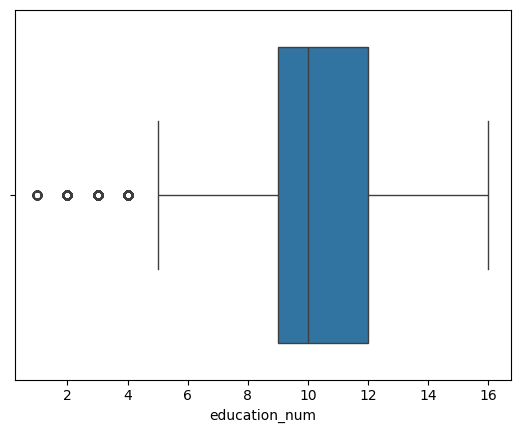

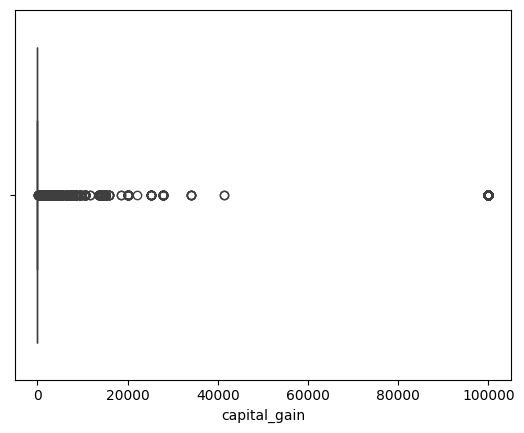

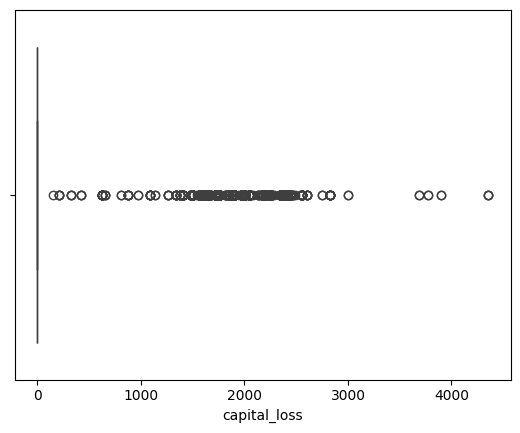

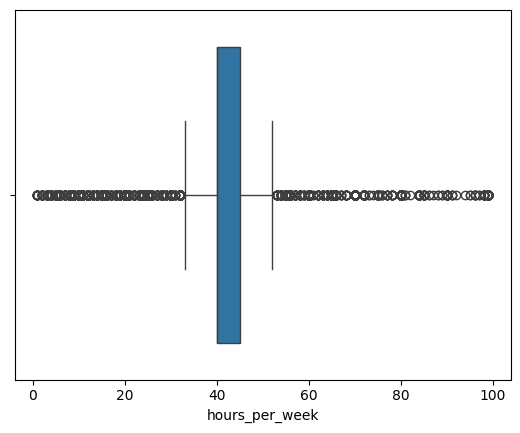

In [12]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(x=df[col]) 
    plt.show()

In [13]:
# handling outliers 
for col in df.select_dtypes(include=['int64','float64']).columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,18594.000000,18594.000000,18594.000000,18594.0,18594.0,18594.000000
mean,37.935624,12.075999,10.235506,0.0,0.0,41.443046
std,12.018017,0.505217,2.162392,0.0,0.0,3.932320
min,17.000000,10.627625,5.000000,0.0,0.0,33.000000
25%,28.000000,11.764604,9.000000,0.0,0.0,40.000000
50%,37.000000,12.122542,10.000000,0.0,0.0,40.000000
75%,46.000000,12.396222,12.000000,0.0,0.0,40.000000
max,78.000000,13.420637,16.000000,0.0,0.0,52.000000


In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
scaler=StandardScaler()
min_max=MinMaxScaler()

In [17]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns

In [18]:
df[numerical_columns]=min_max.fit_transform(df[numerical_columns])

In [19]:
X=df.drop('income',axis=1)
y=df['income']

In [20]:
categorical_columns=X.select_dtypes(include='object').columns

In [21]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ohe_col=[col for col in categorical_columns if X[col].nunique()<5]
le_col=[col for col in categorical_columns if X[col].nunique()>=5]

In [22]:
#Ohe 
ohe_df=pd.get_dummies(X[ohe_col],drop_first=True,dtype=int)

In [23]:
#le 
le=LabelEncoder()
for col in le_col:
    X[col]=le.fit_transform(X[col])

In [24]:
new_X=pd.concat([X,ohe_df],axis=1)

In [25]:
new_X.drop(['sex','age_group'],axis=1,inplace=True)

In [26]:
new_X.reset_index(drop=True)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,age_group_Child,age_group_Senior Citizen
0,0.344262,4,0.592111,8,0.363636,0,6,1,4,0.0,0.0,0.368421,38,1,0,0
1,0.590164,4,0.622458,1,0.181818,2,6,0,2,0.0,0.0,0.368421,38,1,0,0
2,0.180328,4,0.753448,6,0.727273,2,10,5,2,0.0,0.0,0.368421,5,0,0,0
3,0.327869,4,0.691424,9,0.818182,2,4,5,4,0.0,0.0,0.368421,38,0,0,0
4,0.573770,6,0.582001,8,0.363636,2,4,0,4,0.0,0.0,0.631579,38,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,0.590164,4,0.735502,9,0.818182,2,4,0,4,0.0,0.0,0.368421,38,1,0,0
18590,0.081967,4,0.722230,11,0.454545,4,11,1,4,0.0,0.0,0.368421,38,1,0,0
18591,0.163934,4,0.655344,4,0.636364,2,13,5,4,0.0,0.0,0.263158,38,0,0,0
18592,0.377049,4,0.472435,8,0.363636,2,7,0,4,0.0,0.0,0.368421,38,1,0,0


In [27]:
y_transformed=le.fit_transform(y)